In [1]:
from time import perf_counter_ns
from random import random
from tqdm.notebook import tqdm
from decimal import Decimal, localcontext
import seaborn as sns

In [2]:
def score_func(func, title):
    n_range = range(1, 2001)
    results = []
    for n in n_range:
        exec_time = 0
        for _ in range(5):
            data = [random() for _ in range(n)]
            start = perf_counter_ns()
            func(data)
            exec_time += perf_counter_ns() - start
        results.append(exec_time / 5)
    ax = sns.lineplot(x=n_range, y=results)
    ax.set(title=title, xlabel='Number of runs', ylabel='Execution time (ns)')
    return results, ax

Task I

<AxesSubplot:title={'center':'Constant function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

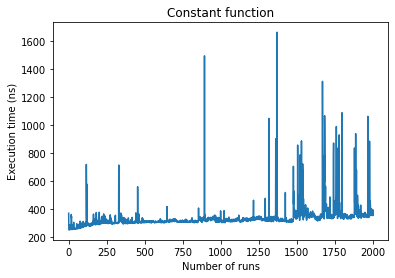

In [3]:
def f_const(arr):
    return 0

score_func(f_const, 'Constant function')[1]

<AxesSubplot:title={'center':'Sum function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

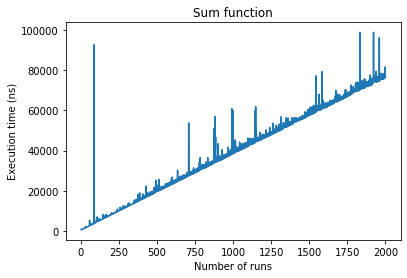

In [4]:
def f_sum(arr):
    res = 0
    for num in arr:
        res += num
    return res

score_func(f_sum, 'Sum function')[1]

<AxesSubplot:title={'center':'Product function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

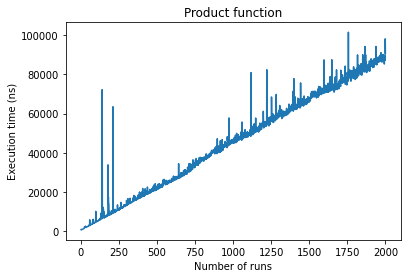

In [5]:
def f_prod(arr):
    res = 1
    for num in arr:
        res *= num
    return res

score_func(f_prod, 'Product function')[1]

<AxesSubplot:title={'center':'Polynom calculation function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

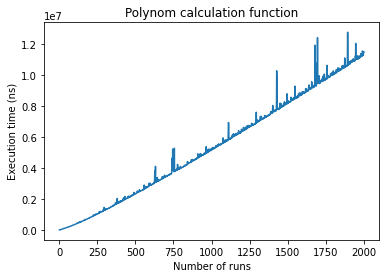

In [6]:
def f_pol_eval(arr):
    with localcontext() as ctx:
        ctx.prec = 100  # 100 digits precision
        res = Decimal(0) 
        for i, num in enumerate(arr):
            res += Decimal(num) * Decimal(1.5) ** i
    return res

score_func(f_pol_eval, 'Polynom calculation function')[1]

<AxesSubplot:title={'center':"Polynom calculation by Horner's method function"}, xlabel='Number of runs', ylabel='Execution time (ns)'>

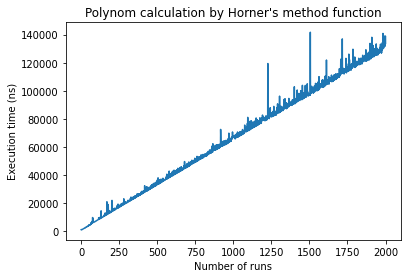

In [7]:
def f_pol_eval_horner(arr):
    res = 0
    for num in arr[:: - 1]:
        res = 1.5 * res + num
    return res

score_func(f_pol_eval_horner, 'Polynom calculation by Horner\'s method function')[1]

<AxesSubplot:title={'center':'Bubble Sort function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

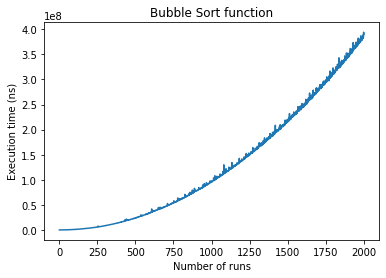

In [8]:
def f_bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[i]:
                arr[j], arr[i] = arr[i], arr[j]

score_func(f_bubble_sort, 'Bubble Sort function')[1]

<AxesSubplot:title={'center':'Quick Sort function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

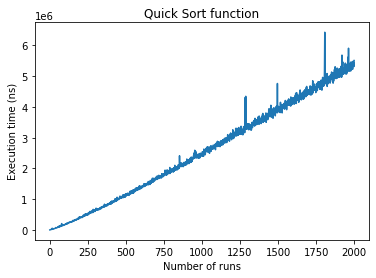

In [9]:
def f_quick_sort(arr):
    less = []
    pivotList = []
    more = []
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        for i in arr:
            if i < pivot:
                less.append(i)
            elif i > pivot:
                more.append(i)
            else:
                pivotList.append(i)
        less = f_quick_sort(less)
        more = f_quick_sort(more)
        return less + pivotList + more

score_func(f_quick_sort, 'Quick Sort function')[1]

<AxesSubplot:title={'center':'Timsort calculation function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

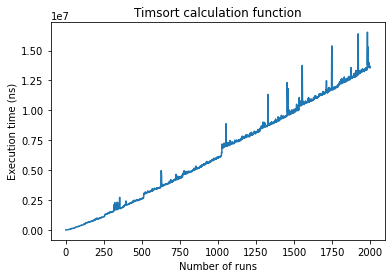

In [10]:
def insertion_sort(arr, left=0, right=None):
    if right is None:
        right = len(arr) - 1

    for i in range(left + 1, right + 1):
        key_item = arr[i]
        j = i - 1
        while j >= left and arr[j] > key_item:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_item

    return arr

def merge(left, right):
    if len(left) == 0:
        return right
    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0
    while len(result) < len(left) + len(right):
        if left[index_left] <= right[index_right]:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        if index_right == len(right):
            result += left[index_left:]
            break
        if index_left == len(left):
            result += right[index_right:]
            break

    return result

def f_timsort(arr):
    min_run = 32
    n = len(arr)

    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run
    while size < n:
        for start in range(0, n, size * 2):
            midpoint = start + size - 1
            end = min((start + size * 2 - 1), (n-1))
            merged = merge(
                left=arr[start:midpoint + 1],
                right=arr[midpoint + 1:end + 1])
            arr[start:start + len(merged)] = merged
        size *= 2

    return arr

score_func(f_timsort, 'Timsort calculation function')[1]

Task II

In [11]:
def score_func(func, title):
    n_range = range(1, 401)
    results = []
    for n in n_range:
        mat1 = [[random() for _ in range(n)] for _ in range(n)]
        mat2 = [[random() for _ in range(n)] for _ in range(n)]
        start = perf_counter_ns()
        func(mat1, mat2)
        exec_time = perf_counter_ns() - start
        results.append(exec_time)
    ax = sns.lineplot(x=n_range, y=results)
    ax.set(title=title, xlabel='Number of runs', ylabel='Execution time (ns)')
    return results, ax

<AxesSubplot:title={'center':'Matrix product function'}, xlabel='Number of runs', ylabel='Execution time (ns)'>

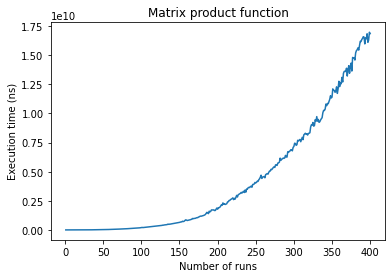

In [12]:
def f_matrix_prod(m1, m2):
    n = len(m1)
    result = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = sum(m1[i][k] * m2[k][j] for k in range(n))
    return result

score_func(f_matrix_prod, 'Matrix product function')[1]